# **CS412 - Machine Learning - Fall 2023**
## **Homework 1**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for Homework 1.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)




❗ **Download the data from SuCourse.** It's named **cs412_hw1_dataset.csv**.
You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .

You will use ChatGPT **3.5** to write your code. For each part, send a prompt to ChatGPT for the task. You can use the initial prompt OR use additional prompts to correct / guide GPT. Copy the code generated by GPT to this notebook and run it here.

❗ **You will share your chat history, so use the same chat for ALL your prompts.**

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS412-HW1.ipynb. (You can download by clicking on File - Download - Download .ipynb). Submit the ipynb to SuCourse.



## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [1]:
# code here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # ratio of the number of correct predictions to total predictions made
from sklearn.metrics import confusion_matrix # matrix of the number of true positive, true negative, false positive, and false negative predictions.
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [2]:
# code here
csv_file = "cs412_hw1_dataset.csv"
df = pd.read_csv(csv_file)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,NaN,female,fish,adult,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,NaN,fish,adult,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,NaN,adult,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,NaN,male,NaN,adult,healthy,2025.0
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,NaN,squid,NaN,healthy,2025.0
3427,Gentoo,NaN,51.4,20.4,258.0,NaN,male,squid,adult,overweight,2025.0
3428,Gentoo,Biscoe,55.9,20.5,247.0,NaN,male,squid,adult,healthy,2025.0


## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [3]:
# find the shape of df
df.shape

(3430, 11)

In [4]:
# display variable names
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage',
       'health_metrics', 'year'],
      dtype='object')

In [5]:
# display the summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   float64
dtypes: float64(5), object(6)
memory usage: 294.9+ KB


In [6]:
# display the first 5 rows of df 
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,NaN,female,fish,adult,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,NaN,fish,adult,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,NaN,adult,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021.0


### Handling missing values

In [7]:
missing_values = df.isnull().sum()
missing_values

species              248
island                42
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                  251
diet                 267
life_stage            69
health_metrics         0
year                  43
dtype: int64

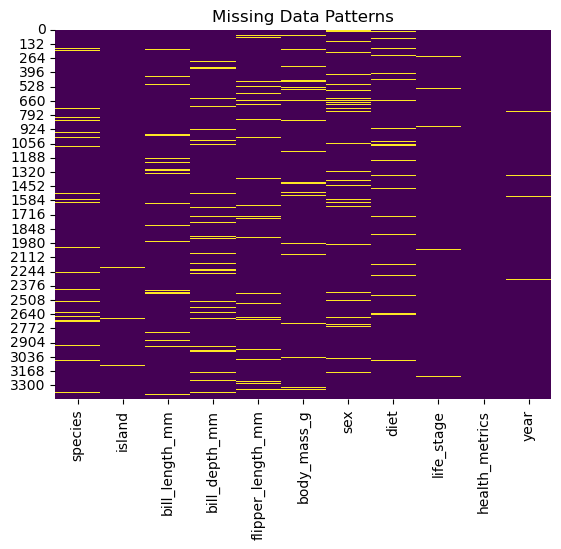

In [8]:
# Step 1: Visualize Missing Data Patterns - Heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Patterns')
plt.show()

#### island has lowest number of missing values. I skimmed the dataset and observed the sequential patterns Backward or forward filling can be used. I asked it to ChatGPT and realized that ChatGPT's code is wrong and it cannot solve the problem. I searched for a method to choose between ffill and bfill on internet

In [9]:
# check both results and compare.  keep the fillings which both methods yields the same.

f = df['island'].fillna(method="ffill")
b = df['island'].fillna(method="bfill")

df['island'] = f.where(f.eq(b))
df['island'].isnull().sum()


0

Thanks God, it doesn't matter whether to use ffill or bfill.

In [10]:
# apply for 'sex'
f = df['sex'].fillna(method="ffill")
b = df['sex'].fillna(method="bfill")

df['sex'] = f.where(f.eq(b))
df['sex'].isnull().sum()


34

#### The number of missing values for 'sex' has been decreased from 251 to 34. This is definetly good. I will look for some other variables to find a correlation in between such that I can guess some missing values using it.

In [11]:
cond = df['sex'].isnull() == True
nan_sex_indexes = df[cond].index.tolist()
print(len(nan_sex_indexes))
nan_sex_indexes

34


[7,
 31,
 147,
 203,
 211,
 315,
 316,
 464,
 563,
 564,
 754,
 1077,
 1209,
 1305,
 1453,
 1578,
 1640,
 1792,
 1871,
 1987,
 2115,
 2136,
 2275,
 2276,
 2397,
 2536,
 2636,
 2677,
 2700,
 2841,
 2869,
 3159,
 3330,
 3331]

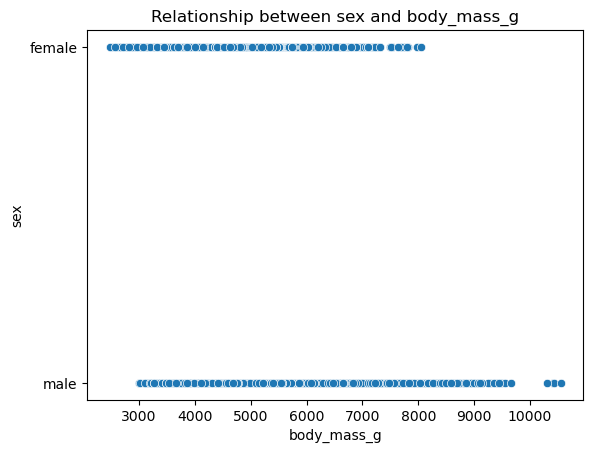

In [12]:
#Explore the relationship between 'sex' and 'body_mass'
sns.scatterplot(x='body_mass_g', y='sex', data=df)
plt.title('Relationship between sex and body_mass_g')
plt.show()

#### No clear distinction between female and male in terms of body_mass_g. But, I will use the very left side of female and very right side of male to fill some missing values.

In [13]:
cond = df['sex'] == 'male'
print("min: ", df[cond]['body_mass_g'].min())

cond = df['sex'] == 'male'
print("max: ", df[cond]['body_mass_g'].max())

min:  3000.0
max:  10549.0


In [14]:
cond1 = df['sex'] == 'male'
min = df[cond1]['body_mass_g'].min()
print("min: ", min)

cond2 = df['sex'] == 'female'
max = df[cond2]['body_mass_g'].max()
print("max: ", max)

for i in nan_sex_indexes:
    if df['body_mass_g'][i] < min:
        print("smaller than min male: ", i, "may be female" )
    elif df['body_mass_g'][i] > max:
        print("greater than max female: ", i, "may be male")

min:  3000.0
max:  8055.0
smaller than min male:  203 may be female


#### I decided to make "female" of sex of the row with index 203 and try another variable that sex may be correlated with.

In [15]:
df.loc[203, 'sex'] = 'female'
df.loc[203]

species              Chinstrap
island                   Dream
bill_length_mm            32.3
bill_depth_mm             16.2
flipper_length_mm        171.0
body_mass_g             2963.0
sex                     female
diet                       NaN
life_stage               chick
health_metrics         healthy
year                    2021.0
Name: 203, dtype: object

#### 'bill_length_mm', 'flipper_length_mm', and 'bill_depth_mm' may differ among sexes. I will check their scattering among sexes. 

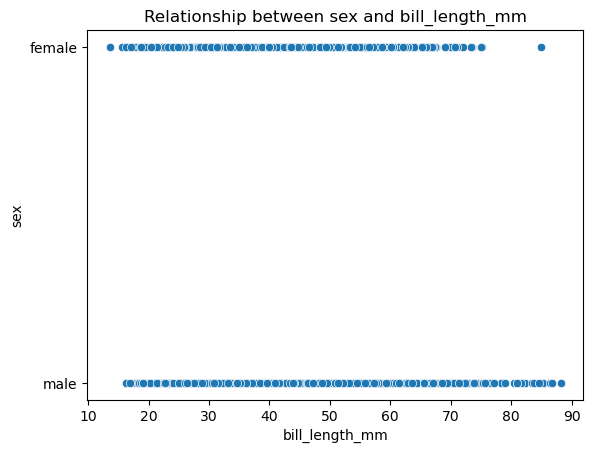

In [16]:
#Explore the relationship between 'sex' and 'bill_length_mm'
sns.scatterplot(x='bill_length_mm', y='sex', data=df)
plt.title('Relationship between sex and bill_length_mm')
plt.show()

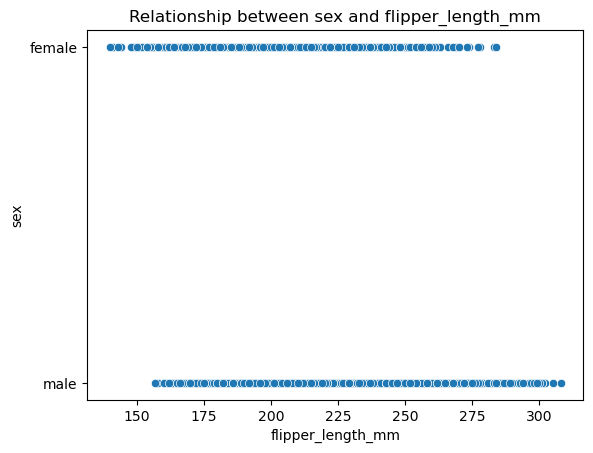

In [17]:
#Explore the relationship between 'sex' and 'flipper_length_mm'
sns.scatterplot(x='flipper_length_mm', y='sex', data=df)
plt.title('Relationship between sex and flipper_length_mm')
plt.show()

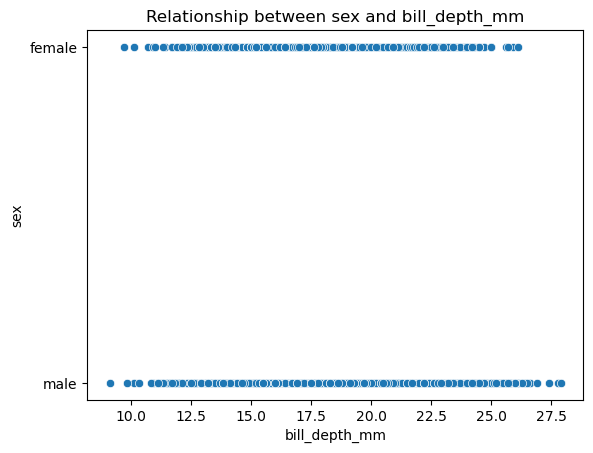

In [18]:
#Explore the relationship between 'sex' and 'bill_depth_mm'
sns.scatterplot(x='bill_depth_mm', y='sex', data=df)
plt.title('Relationship between sex and bill_depth_mm')
plt.show()

#### I will apply the same method as for body_mass_g, i.e., I will interpret the scatterplot again.

In [19]:
cond1 = df['sex'] == 'male'
min = df[cond1]['bill_length_mm'].min()
print("min: ", min)

cond2 = df['sex'] == 'female'
max = df[cond2]['bill_length_mm'].max()
print("max: ", max)

for i in nan_sex_indexes:
    if df['bill_length_mm'][i] < min:
        print("smaller than min male: ", i, "may be female" )
    elif df['bill_length_mm'][i] > max:
        print("greater than max female: ", i, "may be male")


min:  16.3
max:  85.0


In [20]:
cond1 = df['sex'] == 'male'
min = df[cond1]['bill_depth_mm'].min()
print("min: ", min)

cond2 = df['sex'] == 'female'
max = df[cond2]['bill_depth_mm'].max()
print("max: ", max)

for i in nan_sex_indexes:
    if df['bill_depth_mm'][i] < min:
        print("smaller than min male: ", i, "may be female" )
    elif df['bill_depth_mm'][i] > max:
        print("greater than max female: ", i, "may be male")


min:  9.1
max:  26.1
greater than max female:  3159 may be male


In [21]:
df.loc[3159, 'sex'] = 'male'
df.loc[3159]

species                  Gentoo
island                   Biscoe
bill_length_mm             52.5
bill_depth_mm              27.5
flipper_length_mm         252.0
body_mass_g              7845.0
sex                        male
diet                       fish
life_stage                adult
health_metrics       overweight
year                     2025.0
Name: 3159, dtype: object

In [22]:
cond1 = df['sex'] == 'male'
min = df[cond1]['flipper_length_mm'].min()
print("min: ", min)

cond2 = df['sex'] == 'female'
max = df[cond2]['flipper_length_mm'].max()
print("max: ", max)

for i in nan_sex_indexes:
    if df['flipper_length_mm'][i] < min:
        print("smaller than min male: ", i, "may be female" )
    elif df['flipper_length_mm'][i] > max:
        print("greater than max female: ", i, "may be male")

min:  157.0
max:  284.0


#### Only 'bill_depth_mm' was helpful among 'bill_length_mm', 'flipper_length_mm', and 'bill_depth_mm'.

In [23]:
df.isnull().sum()

species              248
island                 0
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                   32
diet                 267
life_stage            69
health_metrics         0
year                  43
dtype: int64

In [24]:
df.isnull().sum()

species              248
island                 0
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                   32
diet                 267
life_stage            69
health_metrics         0
year                  43
dtype: int64

In [25]:
print(df[df['sex'] == "male"].shape)

print(df[df['sex'] == "female"].shape)

(1691, 11)
(1707, 11)


#### The output of the above cell shows that the data is not skewed. I can fill the remaining NaN values with the most common value: Male

In [26]:
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

print(df[df['sex'] == "male"].shape)

print(df[df['sex'] == "female"].shape)

(1691, 11)
(1739, 11)


#### Now, I will fill the missing values in other variables. I will continue with the categorical variables since some missing values in numerical variables may eliminate in the mean time.

#### Handling missing values for diet

In [27]:
df.isnull().sum()

species              248
island                 0
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                    0
diet                 267
life_stage            69
health_metrics         0
year                  43
dtype: int64

In [28]:
# apply ffill/bfill

# check both results and compare.  keep the fillings which both methods yields the same.

f = df['diet'].fillna(method="ffill")
b = df['diet'].fillna(method="bfill")

df['diet'] = f.where(f.eq(b))
df['diet'].isnull().sum()

22

#### It decreased from 267 to 22. Let's see those data points

In [29]:
df[df['diet'].isnull() == True]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
12,Adelie,Biscoe,57.4,19.5,255.0,5920.0,male,NaN,adult,healthy,2021.0
25,Adelie,Biscoe,30.2,13.1,NaN,2945.0,female,NaN,chick,healthy,2021.0
107,Adelie,Dream,37.7,23.8,214.0,6280.0,male,NaN,adult,overweight,2021.0
170,Chinstrap,Dream,62.1,20.3,269.0,7121.0,male,NaN,adult,overweight,2021.0
203,Chinstrap,Dream,32.3,16.2,171.0,2963.0,female,NaN,chick,healthy,2021.0
559,Adelie,Dream,25.0,12.7,197.0,3950.0,male,NaN,NaN,overweight,2022.0
560,Adelie,Dream,47.1,15.1,183.0,3804.0,male,NaN,chick,overweight,2022.0
641,Adelie,Torgensen,46.9,13.9,183.0,4128.0,male,NaN,chick,overweight,2022.0
651,Chinstrap,Dream,48.7,17.3,215.0,5466.0,female,NaN,juvenile,overweight,2022.0
1104,Adelie,Biscoe,38.6,14.6,186.0,4011.0,male,NaN,chick,overweight,2023.0


#### I have checked the dataset and I saw that there may be a strong relationship between 'island' and 'diet' in some cases. I will visualize to make more reliable imputations.

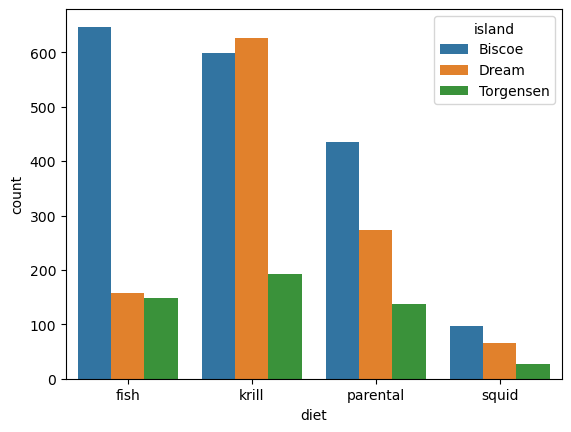

In [30]:
# Create a stacked bar chart
sns.countplot(x='diet', hue='island', data=df)
plt.show()


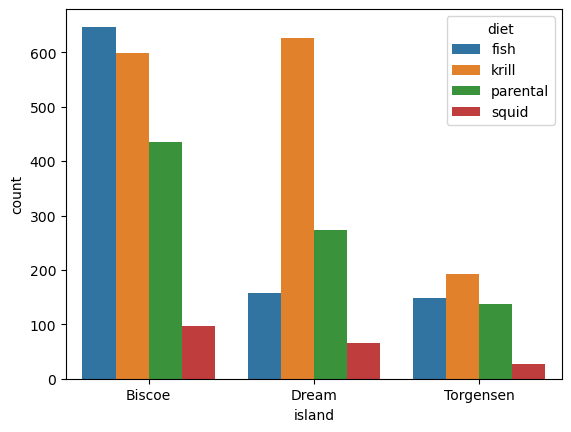

In [31]:
sns.countplot(x='island', hue='diet', data=df)
plt.show()

In [32]:
df[df['diet'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
12,Adelie,Biscoe,57.4,19.5,255.0,5920.0,male,NaN,adult,healthy,2021.0
25,Adelie,Biscoe,30.2,13.1,NaN,2945.0,female,NaN,chick,healthy,2021.0
107,Adelie,Dream,37.7,23.8,214.0,6280.0,male,NaN,adult,overweight,2021.0
170,Chinstrap,Dream,62.1,20.3,269.0,7121.0,male,NaN,adult,overweight,2021.0
203,Chinstrap,Dream,32.3,16.2,171.0,2963.0,female,NaN,chick,healthy,2021.0
559,Adelie,Dream,25.0,12.7,197.0,3950.0,male,NaN,NaN,overweight,2022.0
560,Adelie,Dream,47.1,15.1,183.0,3804.0,male,NaN,chick,overweight,2022.0
641,Adelie,Torgensen,46.9,13.9,183.0,4128.0,male,NaN,chick,overweight,2022.0
651,Chinstrap,Dream,48.7,17.3,215.0,5466.0,female,NaN,juvenile,overweight,2022.0
1104,Adelie,Biscoe,38.6,14.6,186.0,4011.0,male,NaN,chick,overweight,2023.0


#### Based on the above visualizations, I decided to fill the NaN diet values of the rows whose island value is 'Dream' or 'Torgensen' with 'krill'. Fill with 'fish', if island is 'Biscoe'.

In [33]:
cond1 = (df['diet'].isnull()) & (df['island'] == 'Dream')
cond2 = (df['diet'].isnull()) & (df['island'] == 'Torgensen')
cond3 = (df['diet'].isnull()) & (df['island'] == 'Biscoe')

df.loc[cond1 | cond2, 'diet'] = 'krill'
df.loc[cond3, 'diet'] = 'fish'


In [34]:
# compare some rows with the previous state to see if the imputation is successful or  not
df.loc[[12, 25, 107, 170, 203, 559, 560, 641, 651]]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
12,Adelie,Biscoe,57.4,19.5,255.0,5920.0,male,fish,adult,healthy,2021.0
25,Adelie,Biscoe,30.2,13.1,NaN,2945.0,female,fish,chick,healthy,2021.0
107,Adelie,Dream,37.7,23.8,214.0,6280.0,male,krill,adult,overweight,2021.0
170,Chinstrap,Dream,62.1,20.3,269.0,7121.0,male,krill,adult,overweight,2021.0
203,Chinstrap,Dream,32.3,16.2,171.0,2963.0,female,krill,chick,healthy,2021.0
559,Adelie,Dream,25.0,12.7,197.0,3950.0,male,krill,NaN,overweight,2022.0
560,Adelie,Dream,47.1,15.1,183.0,3804.0,male,krill,chick,overweight,2022.0
641,Adelie,Torgensen,46.9,13.9,183.0,4128.0,male,krill,chick,overweight,2022.0
651,Chinstrap,Dream,48.7,17.3,215.0,5466.0,female,krill,juvenile,overweight,2022.0


In [35]:
df.isnull().sum()

species              248
island                 0
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                    0
diet                   0
life_stage            69
health_metrics         0
year                  43
dtype: int64

#### The values filled successfully. Let's proceed with the other variables.

### Handling missing values for 'year'

In [36]:
# apply ffill/bfill

# check both results and compare.  keep the fillings which both methods yields the same.

f = df['year'].fillna(method="ffill")
b = df['year'].fillna(method="bfill")

df['year'] = f.where(f.eq(b))
df['year'].isnull().sum()

1

In [37]:
df[df['year'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
356,Adelie,Biscoe,55.5,19.3,222.0,6257.0,female,fish,adult,overweight,NaN


#### I have checked that data point from the dataset. It is likely to be 2022. 

In [38]:
# replace the missing year value with 2022

df.loc[356, 'year'] = 2022.0
df.loc[356]

species                  Adelie
island                   Biscoe
bill_length_mm             55.5
bill_depth_mm              19.3
flipper_length_mm         222.0
body_mass_g              6257.0
sex                      female
diet                       fish
life_stage                adult
health_metrics       overweight
year                     2022.0
Name: 356, dtype: object

### Handling missing values for 'life_stage'

#### Unlike previous variables, 'life_stage' does not have sequential patterns

In [39]:
df[df['life_stage'].isnull() == True]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
50,Adelie,Dream,37.6,16.7,218.0,5372.0,female,fish,NaN,overweight,2021.0
65,Adelie,Dream,NaN,15.0,196.0,NaN,female,krill,NaN,healthy,2021.0
71,Adelie,Dream,30.6,19.0,184.0,3889.0,female,krill,NaN,healthy,2021.0
78,Adelie,Dream,21.9,18.6,224.0,NaN,male,krill,NaN,overweight,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
3021,Chinstrap,Dream,29.0,18.2,180.0,3888.0,female,krill,NaN,healthy,2025.0
3218,Gentoo,Biscoe,36.2,20.2,179.0,4319.0,female,krill,NaN,healthy,2025.0
3272,Gentoo,Biscoe,25.4,20.7,189.0,4691.0,female,krill,NaN,healthy,2025.0
3343,Gentoo,Biscoe,28.5,16.1,189.0,3553.0,female,parental,NaN,healthy,2025.0


#### To observe some relations that may be helpful for missing value treatment for life_stage with other variables, make some visualizations. I have checked the dataset and realized that 'diet' may be useful.

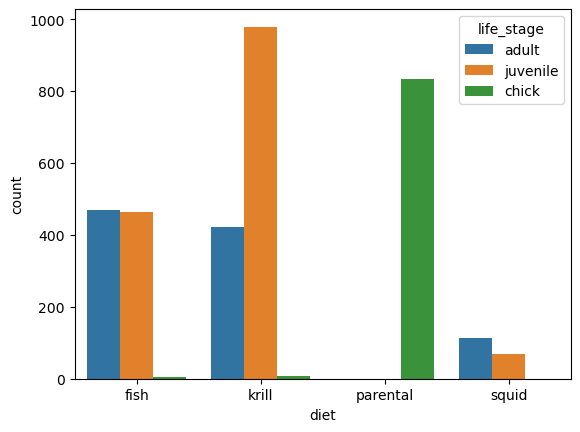

In [40]:
# Create a stacked bar chart
sns.countplot(x='diet', hue='life_stage', data=df)
plt.show()



In [41]:
cond0 = df['life_stage'].isnull() == True
cond1 = cond0 & (df['diet'] == 'parental')
cond2 = cond0 & (df['diet'] == 'krill')
cond3 = cond0 & (df['diet'] == 'squid')

df.loc[cond1, 'life_stage'] = 'chick'
df.loc[cond2, 'life_stage'] = 'juvenile'
df.loc[cond3, 'life_stage'] = 'adult'

In [42]:
print(df['life_stage'].isnull().sum())


23


#### The number of missing values has decreased from 69 to 23.

In [43]:
df[df['life_stage'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
50,Adelie,Dream,37.6,16.7,218.0,5372.0,female,fish,NaN,overweight,2021.0
248,Gentoo,Biscoe,65.0,19.4,242.0,6492.0,female,fish,NaN,overweight,2021.0
387,Adelie,Biscoe,38.7,20.9,201.0,4884.0,male,fish,NaN,healthy,2022.0
821,Gentoo,Biscoe,NaN,18.9,233.0,7121.0,male,fish,NaN,overweight,2022.0
822,Gentoo,Biscoe,62.3,25.5,274.0,7754.0,male,fish,NaN,overweight,2022.0
829,Gentoo,Biscoe,55.2,20.0,237.0,6687.0,male,fish,NaN,overweight,2022.0
1041,Adelie,Biscoe,37.7,14.2,230.0,5810.0,male,fish,NaN,overweight,2023.0
1339,Chinstrap,Dream,50.7,19.6,278.0,6290.0,female,fish,NaN,overweight,2023.0
1348,Chinstrap,Dream,51.8,18.8,232.0,5498.0,male,fish,NaN,overweight,2023.0


#### Most of the rows with missing life_stage have 'overweight' value in 'health_metrics'. Fill the NaN values with 'life_stage' value of 'overweight' rows. 

In [44]:
df.loc[df['health_metrics'] == 'overweight', 'life_stage'].value_counts()


life_stage
juvenile    512
adult       472
chick       162
Name: count, dtype: int64

In [45]:
df.loc[df['health_metrics'] == 'overweight', 'life_stage'] = 'juvenile'
df.isnull().sum()

species              248
island                 0
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                    0
diet                   0
life_stage             2
health_metrics         0
year                   0
dtype: int64

#### Replace the remaining NaN 'life_stage' values with the mode of 'life_stage'

In [46]:
df['life_stage'].fillna(df['life_stage'].mode()[0], inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,juvenile,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,NaN,female,fish,juvenile,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,juvenile,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,juvenile,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,NaN,male,squid,adult,healthy,2025.0
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025.0
3427,Gentoo,Biscoe,51.4,20.4,258.0,NaN,male,squid,juvenile,overweight,2025.0
3428,Gentoo,Biscoe,55.9,20.5,247.0,NaN,male,squid,adult,healthy,2025.0


### Handling missing values for 'species'

#### Similar to most of the categorical variables in this dataset, 'species' also has sequential patterns. Apply ffill or bfill.

In [47]:
# check both results and compare.  keep the fillings which both methods yields the same.

f = df['species'].fillna(method="ffill")
b = df['species'].fillna(method="bfill")

df['species'] = f.where(f.eq(b))
df['species'].isnull().sum()


0

In [48]:
df.isnull().sum()

species                0
island                 0
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                    0
diet                   0
life_stage             0
health_metrics         0
year                   0
dtype: int64

### Handling missing values in numerical variables

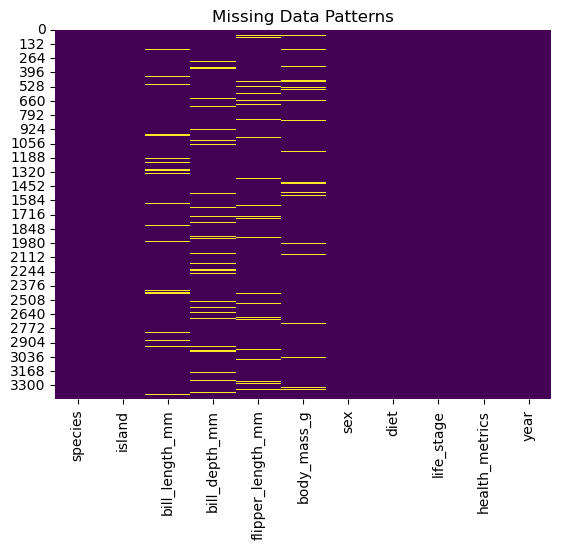

In [49]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Patterns')
plt.show()

#### As one can see, the missing values are missing completely at random and the values are close to  each other in all of the numerical variables: bill_length, bill_depth, and flipper_length_mm. Therefore, I will impute the missing values with the mean values. I have already completed the missing value treatment for categorical variables detailly. So, I can use this method. 


#### Since this method is not the perfect way, I want to eliminate rows with missing values more than 2. 

In [50]:
df[df.isnull().sum(axis=1) > 2]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
526,Adelie,Dream,NaN,15.8,NaN,NaN,male,krill,juvenile,healthy,2022.0
1434,Chinstrap,Dream,NaN,NaN,174.0,NaN,female,parental,juvenile,overweight,2023.0
1657,Gentoo,Biscoe,NaN,NaN,NaN,3594.0,female,parental,chick,healthy,2023.0
2469,Gentoo,Biscoe,24.6,NaN,NaN,NaN,male,krill,juvenile,underweight,2024.0
3361,Gentoo,Biscoe,41.6,NaN,NaN,NaN,male,parental,chick,underweight,2025.0


In [51]:
# Define the rows with more than 2 NaN values 
condition = (df.isnull().sum(axis=1) > 2)

df.drop(df[condition].index, inplace=True)

df.isnull().sum()

species                0
island                 0
bill_length_mm       187
bill_depth_mm        259
flipper_length_mm    207
body_mass_g          226
sex                    0
diet                   0
life_stage             0
health_metrics         0
year                   0
dtype: int64

In [52]:
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.000000,female,fish,juvenile,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,4825.603626,female,fish,juvenile,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.000000,female,fish,juvenile,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.000000,female,fish,juvenile,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.000000,female,fish,juvenile,overweight,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,4825.603626,male,squid,adult,healthy,2025.0
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.000000,male,squid,adult,healthy,2025.0
3427,Gentoo,Biscoe,51.4,20.4,258.0,4825.603626,male,squid,juvenile,overweight,2025.0
3428,Gentoo,Biscoe,55.9,20.5,247.0,4825.603626,male,squid,adult,healthy,2025.0


In [53]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
diet                 0
life_stage           0
health_metrics       0
year                 0
dtype: int64

In [54]:
df.species.value_counts()

species
Adelie       1559
Gentoo       1244
Chinstrap     622
Name: count, dtype: int64

In [55]:
sex_map = {'female':1, 'male': 0}

island_map = {'Biscoe': 1,
              'Dream': 2,
              'Torgensen': 3}

diet_map = {'fish': 1,
              'krill': 2,
              'squid': 3,
            "parental":4}

life_stage_map = {'chick': 1,
              'juvenile': 2,
              'adult': 3}

health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}


# Map categorical columns using the given mappings
df['sex'] = df['sex'].map(sex_map)
df['island'] = df['island'].map(island_map)
df['diet'] = df['diet'].map(diet_map)
df['life_stage'] = df['life_stage'].map(life_stage_map)
df['health_metrics'] = df['health_metrics'].map(health_metrics_map)


In [56]:
# add mapping for species
species_map = {'Adelie': 1,
              'Gentoo': 2,
              'Chinstrap': 3}

df['species'] = df['species'].map(species_map)

## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [57]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the dataset
df_shuffled = shuffle(df, random_state=42)  # Use a specific random_state for reproducibility

# Separate dependent variable (y) and independent variables (X)
X = df_shuffled.drop('health_metrics', axis=1)
y = df_shuffled['health_metrics']

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")





X_train shape: (2740, 10)
X_test shape: (685, 10)
y_train shape: (2740,)
y_test shape: (685,)


In [58]:
# check if y is balanced in the dataset or not
health_metrics_counts = df['health_metrics'].value_counts()
class_1_ratio = health_metrics_counts[1] / (health_metrics_counts.sum())
class_2_ratio = health_metrics_counts[2] / (health_metrics_counts.sum())
class_3_ratio = health_metrics_counts[3] / (health_metrics_counts.sum())
print(f"Class 1 ratio: {class_1_ratio:.3f}")
print(f"Class 2 ratio: {class_2_ratio:.3f}")
print(f"Class 3 ratio: {class_3_ratio:.3f}")

Class 1 ratio: 0.452
Class 2 ratio: 0.340
Class 3 ratio: 0.208


#### The data is imbalanced. Use stratification while splitting train and test data. It ensures the distribution of the target variable is approximately the same in both sets as it is in the original dataset

In [59]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the dataset
df_shuffled = shuffle(df, random_state=42)  # Use a specific random_state for reproducibility

# Separate dependent variable (y) and independent variables (X)
X = df_shuffled.drop('health_metrics', axis=1)
y = df_shuffled['health_metrics']

# Split the dataset into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2740, 10)
X_test shape: (685, 10)
y_train shape: (2740,)
y_test shape: (685,)


In [60]:
print('Train data:')
health_metrics_counts1 = y_train.value_counts()
class_1_ratio = health_metrics_counts1[1] / (health_metrics_counts1.sum())
class_2_ratio = health_metrics_counts1[2] / (health_metrics_counts1.sum())
class_3_ratio = health_metrics_counts1[3] / (health_metrics_counts1.sum())
print(f"Class 1 ratio: {class_1_ratio:.3f}")
print(f"Class 2 ratio: {class_2_ratio:.3f}")
print(f"Class 3 ratio: {class_3_ratio:.3f}")
print("-----------------------")
print('Test data:')
health_metrics_counts2 = y_test.value_counts()
class_1_ratio = health_metrics_counts2[1] / (health_metrics_counts2.sum())
class_2_ratio = health_metrics_counts2[2] / (health_metrics_counts2.sum())
class_3_ratio = health_metrics_counts2[3] / (health_metrics_counts2.sum())
print(f"Class 1 ratio: {class_1_ratio:.3f}")
print(f"Class 2 ratio: {class_2_ratio:.3f}")
print(f"Class 3 ratio: {class_3_ratio:.3f}")

Train data:
Class 1 ratio: 0.452
Class 2 ratio: 0.341
Class 3 ratio: 0.208
-----------------------
Test data:
Class 1 ratio: 0.453
Class 2 ratio: 0.340
Class 3 ratio: 0.207


## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


### Correlations of features with health 

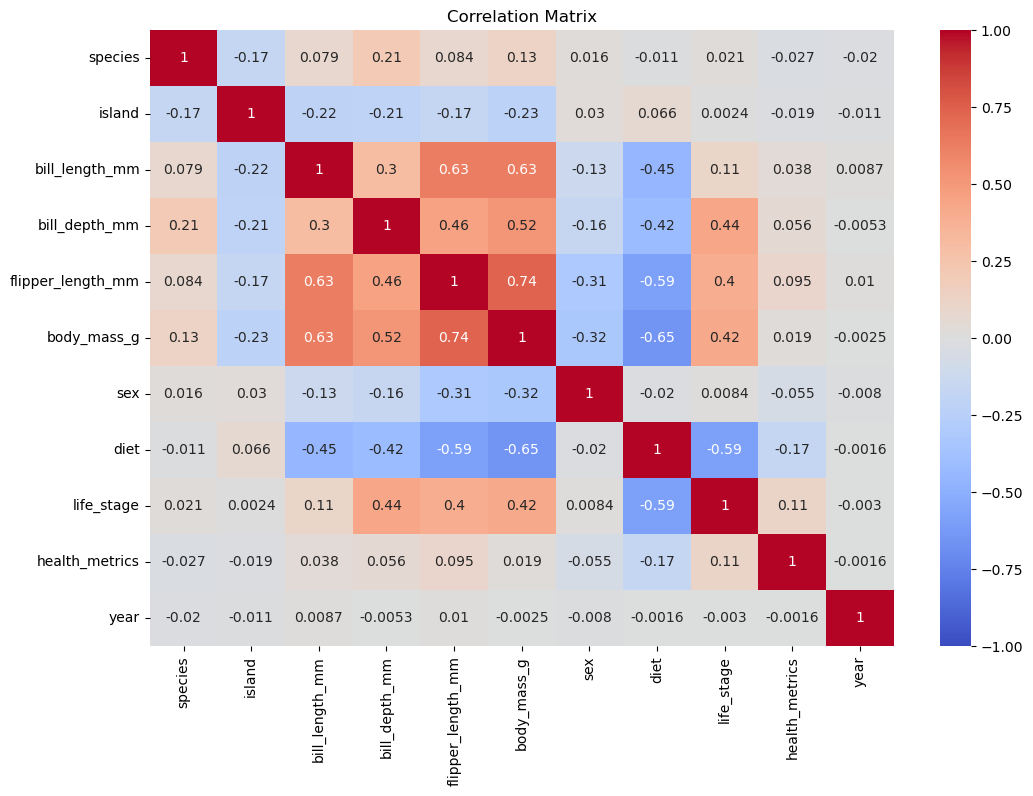

Correlations with 'health_metrics':
 health_metrics       1.000000
life_stage           0.111513
flipper_length_mm    0.095453
bill_depth_mm        0.056295
bill_length_mm       0.038476
body_mass_g          0.019258
year                -0.001565
island              -0.018789
species             -0.027148
sex                 -0.055432
diet                -0.168709
Name: health_metrics, dtype: float64


In [61]:
# code here

# Calculate correlations for all features in the dataset
correlation_matrix = df.corr()

# Highlight strong correlations with the target variable ('health_metrics')
target_correlations = correlation_matrix['health_metrics'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Display correlations with the target variable
print("Correlations with 'health_metrics':\n", target_correlations)





### Feature Selection

In [62]:
# code here

# Sort features based on absolute correlations with the target variable
sorted_features = target_correlations.abs().sort_values(ascending=False).index

# Display sorted features
print("Sorted Features based on Absolute Correlation:\n", sorted_features)

# Select top N features with the highest absolute correlations
N = 6
selected_features = sorted_features[1:N+1]

# Display selected features
print("Selected Features based on Absolute Correlation:\n", selected_features)





Sorted Features based on Absolute Correlation:
 Index(['health_metrics', 'diet', 'life_stage', 'flipper_length_mm',
       'bill_depth_mm', 'sex', 'bill_length_mm', 'species', 'body_mass_g',
       'island', 'year'],
      dtype='object')
Selected Features based on Absolute Correlation:
 Index(['diet', 'life_stage', 'flipper_length_mm', 'bill_depth_mm', 'sex',
       'bill_length_mm'],
      dtype='object')


### Hypothetical Driver Features


##### Make some visualizations to understand the case better

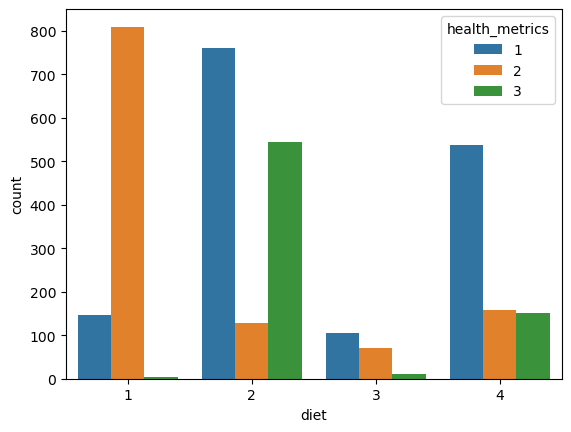

In [63]:
sns.countplot(x='diet', hue='health_metrics', data=df)
plt.show()

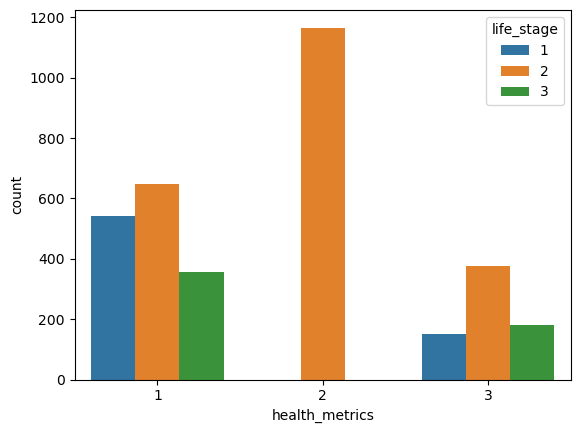

In [64]:
sns.countplot(x='health_metrics', hue='life_stage', data=df)
plt.show()

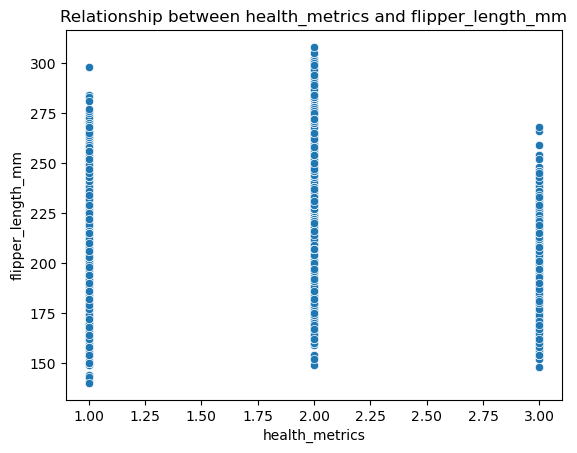

In [65]:
#Explore the relationship between 'health_metrics' and 'flipper_length_mm'
sns.scatterplot(x='health_metrics', y='flipper_length_mm', data=df)
plt.title('Relationship between health_metrics and flipper_length_mm')
plt.show()

##### Diet and life stage are the 2 features that are most correlated with health_metrics (as the correlation matrix implies)
##### I will combine them. 
##### I want to create a categorical variable whose values are the possible combinations of life_stage and diet.

In [66]:
possible_diets = df['diet'].unique()
possible_life_stages = df['life_stage'].unique()

possible_pairs = []
for i in possible_diets:
    for j in possible_life_stages:
        possible_pairs.append((i,j))

for p in possible_pairs:
    print(p)

(1, 2)
(1, 3)
(1, 1)
(2, 2)
(2, 3)
(2, 1)
(4, 2)
(4, 3)
(4, 1)
(3, 2)
(3, 3)
(3, 1)


In [67]:
# Create a new feature indicating the pair for each row
df['diet_life_stage_pair'] = df[['diet', 'life_stage']].apply(tuple, axis=1).map(lambda x: possible_pairs.index(x) + 1)

# The +1 is used to avoid having a pair with index 0

# Display the DataFrame with the new feature
print(df[['diet', 'life_stage', 'diet_life_stage_pair']])

      diet  life_stage  diet_life_stage_pair
0        1           2                     1
1        1           2                     1
2        1           2                     1
3        1           2                     1
4        1           2                     1
...    ...         ...                   ...
3425     3           3                    11
3426     3           3                    11
3427     3           2                    10
3428     3           3                    11
3429     1           3                     2

[3425 rows x 3 columns]


In [68]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year,diet_life_stage_pair
0,1,1,53.4,17.8,219.0,5687.000000,1,1,2,2,2021.0,1
1,1,1,49.3,18.1,245.0,4825.603626,1,1,2,2,2021.0,1
2,1,1,55.7,16.6,226.0,5388.000000,1,1,2,2,2021.0,1
3,1,1,38.0,15.6,221.0,6262.000000,1,1,2,2,2021.0,1
4,1,1,60.7,17.9,177.0,4811.000000,1,1,2,2,2021.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3425,2,1,44.0,20.4,252.0,4825.603626,0,3,3,1,2025.0,11
3426,2,1,54.5,25.2,245.0,6872.000000,0,3,3,1,2025.0,11
3427,2,1,51.4,20.4,258.0,4825.603626,0,3,2,2,2025.0,10
3428,2,1,55.9,20.5,247.0,4825.603626,0,3,3,1,2025.0,11


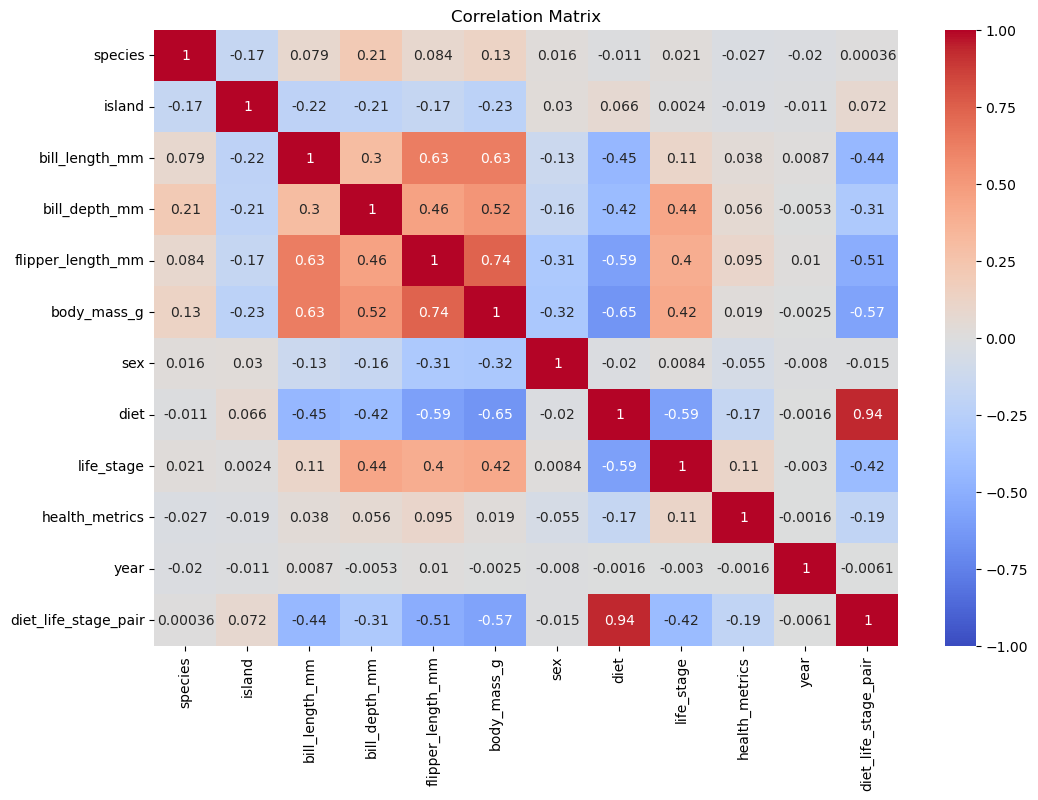

Correlations with 'health_metrics':
 health_metrics          1.000000
life_stage              0.111513
flipper_length_mm       0.095453
bill_depth_mm           0.056295
bill_length_mm          0.038476
body_mass_g             0.019258
year                   -0.001565
island                 -0.018789
species                -0.027148
sex                    -0.055432
diet                   -0.168709
diet_life_stage_pair   -0.194153
Name: health_metrics, dtype: float64


In [69]:
# check the correlations matrix again
cor_mat = df.corr()

# Highlight strong correlations with the target variable ('health_metrics')
target_correlations = cor_mat['health_metrics'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Display correlations with the target variable
print("Correlations with 'health_metrics':\n", target_correlations)

##### Creating the second feature

In [70]:
df['super_duper_nicely_generated_feature']  = (df['diet'] / df['life_stage']) *  df['body_mass_g'] / (df['flipper_length_mm'] * df['bill_depth_mm'] * df['bill_length_mm'])

In [71]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year,diet_life_stage_pair,super_duper_nicely_generated_feature
0,1,1,53.4,17.8,219.0,5687.000000,1,1,2,2,2021.0,1,0.013660
1,1,1,49.3,18.1,245.0,4825.603626,1,1,2,2,2021.0,1,0.011036
2,1,1,55.7,16.6,226.0,5388.000000,1,1,2,2,2021.0,1,0.012892
3,1,1,38.0,15.6,221.0,6262.000000,1,1,2,2,2021.0,1,0.023899
4,1,1,60.7,17.9,177.0,4811.000000,1,1,2,2,2021.0,1,0.012508
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,2,1,44.0,20.4,252.0,4825.603626,0,3,3,1,2025.0,11,0.021334
3426,2,1,54.5,25.2,245.0,6872.000000,0,3,3,1,2025.0,11,0.020423
3427,2,1,51.4,20.4,258.0,4825.603626,0,3,2,2,2025.0,10,0.026757
3428,2,1,55.9,20.5,247.0,4825.603626,0,3,3,1,2025.0,11,0.017049


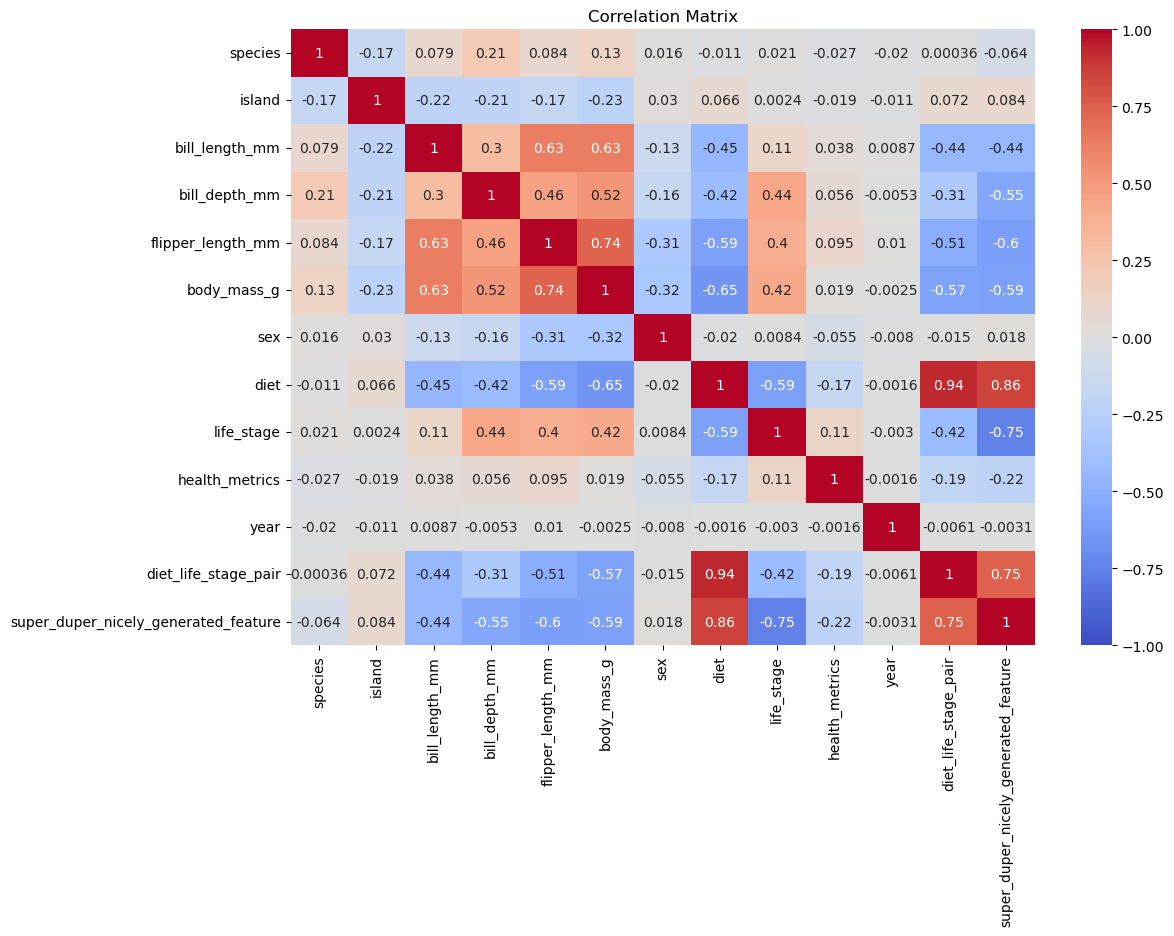

Correlations with 'health_metrics':
 health_metrics                          1.000000
life_stage                              0.111513
flipper_length_mm                       0.095453
bill_depth_mm                           0.056295
bill_length_mm                          0.038476
body_mass_g                             0.019258
year                                   -0.001565
island                                 -0.018789
species                                -0.027148
sex                                    -0.055432
diet                                   -0.168709
diet_life_stage_pair                   -0.194153
super_duper_nicely_generated_feature   -0.215986
Name: health_metrics, dtype: float64


In [72]:
cor_mat = df.corr()

# Highlight strong correlations with the target variable ('health_metrics')
target_correlations = cor_mat['health_metrics'].sort_values(ascending=False)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Display correlations with the target variable
print("Correlations with 'health_metrics':\n", target_correlations)

**You can write your answers to (4.1) here.**
----
##### To generate the first feature, I have check the most correlated two features with 'health_metrics'. They are 'life_stage' and 'diet'. I wanted to create a combination that show which pair of 'life_stage' and 'diet' a row fits. So I created 3x4 pairs. I assigned each of them to ordinal numbers. The name of the generated feature is 'diet_life_stage_pair'.

##### The correlation rate between 'life_stage' and 'health_metrics': 0.111513
##### The correlation rate between 'diet' and 'health_metrics': -0.168709
##### The correlation rate between 'diet_life_stage_pair' and 'health_metrics': -0.194153

##### I tried some liner combinations and some logarithmic combinations of some features. Mostly, I used 'life_stage', 'diet', 'body_mass_g', 'flipper_length_mm', 'bill_depth_mm', and 'bill_length_mm' because they are either in the most correlated features list or it makes sense to predict 'health_metrics' using those features. (for example,'body_mass_g').
##### The correlation rate between 'diet_life_stage_pair' and 'health_metrics': -0.215986
----

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



**Add explanation here:**

##### I chose 'max_depth' and 'min_samples_split' as the hyperparameters to tune. 

##### 'max_depth':  The maximum number of nodes that the tree can split once more.
##### I chose these because 'max_depth' needs to be controlled to decrease the complexity of the tree since the number of samples required to populate the tree doubles for each additional level the tree grows to, leading an overfitted model. 

##### 'min_samples_split': The minimum number of samples required to make a split.
##### I chose 'min_samples_split' because the dataset is large and we need to ensure generalization in the model. Setting a higher value reduces the chance of creating small, specific splits that capture noise in the training data. It promotes more robust splits that are based on a larger number of samples, contributing to better generalization.

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
# code here


# param_grid represents the hyperparameters we want to try (our search space)
param_grid = {
    'max_depth': [3, 5, 8, 12, 16, 18],
    'min_samples_split': [5, 8, 14, 20, 25]
}

# estimator is the model we are evaluating, Decision Tree in our case
estimator = DecisionTreeClassifier(criterion='entropy', random_state=42)

# scoring is the score used to choose the best model
scoring='accuracy'

# cv is the number of folds to use for cross validation
cv = 5

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring=scoring,
    cv=cv)

grid_search.fit(X_train, y_train)


# Access the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


print("Best parameter values: ", best_params)





Best parameter values:  {'max_depth': 12, 'min_samples_split': 14}


In [74]:
cols_to_include = ['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'std_test_score']
results = pd.DataFrame(grid_search.cv_results_)[cols_to_include]
results.sort_values(by='mean_test_score', ascending=False)

,param_max_depth,param_min_samples_split,mean_test_score,std_test_score
17,12,14,0.937226,0.013088
27,18,14,0.936131,0.011599
22,16,14,0.936131,0.011599
25,18,5,0.934307,0.010127
20,16,5,0.934307,0.010127
16,12,8,0.933212,0.008835
15,12,5,0.932482,0.012049
26,18,8,0.930657,0.009305
21,16,8,0.930657,0.009305
28,18,20,0.928102,0.012986


## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [75]:
# code here



model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth = 12, min_samples_split = 14)

model.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=14,
                       random_state=42)

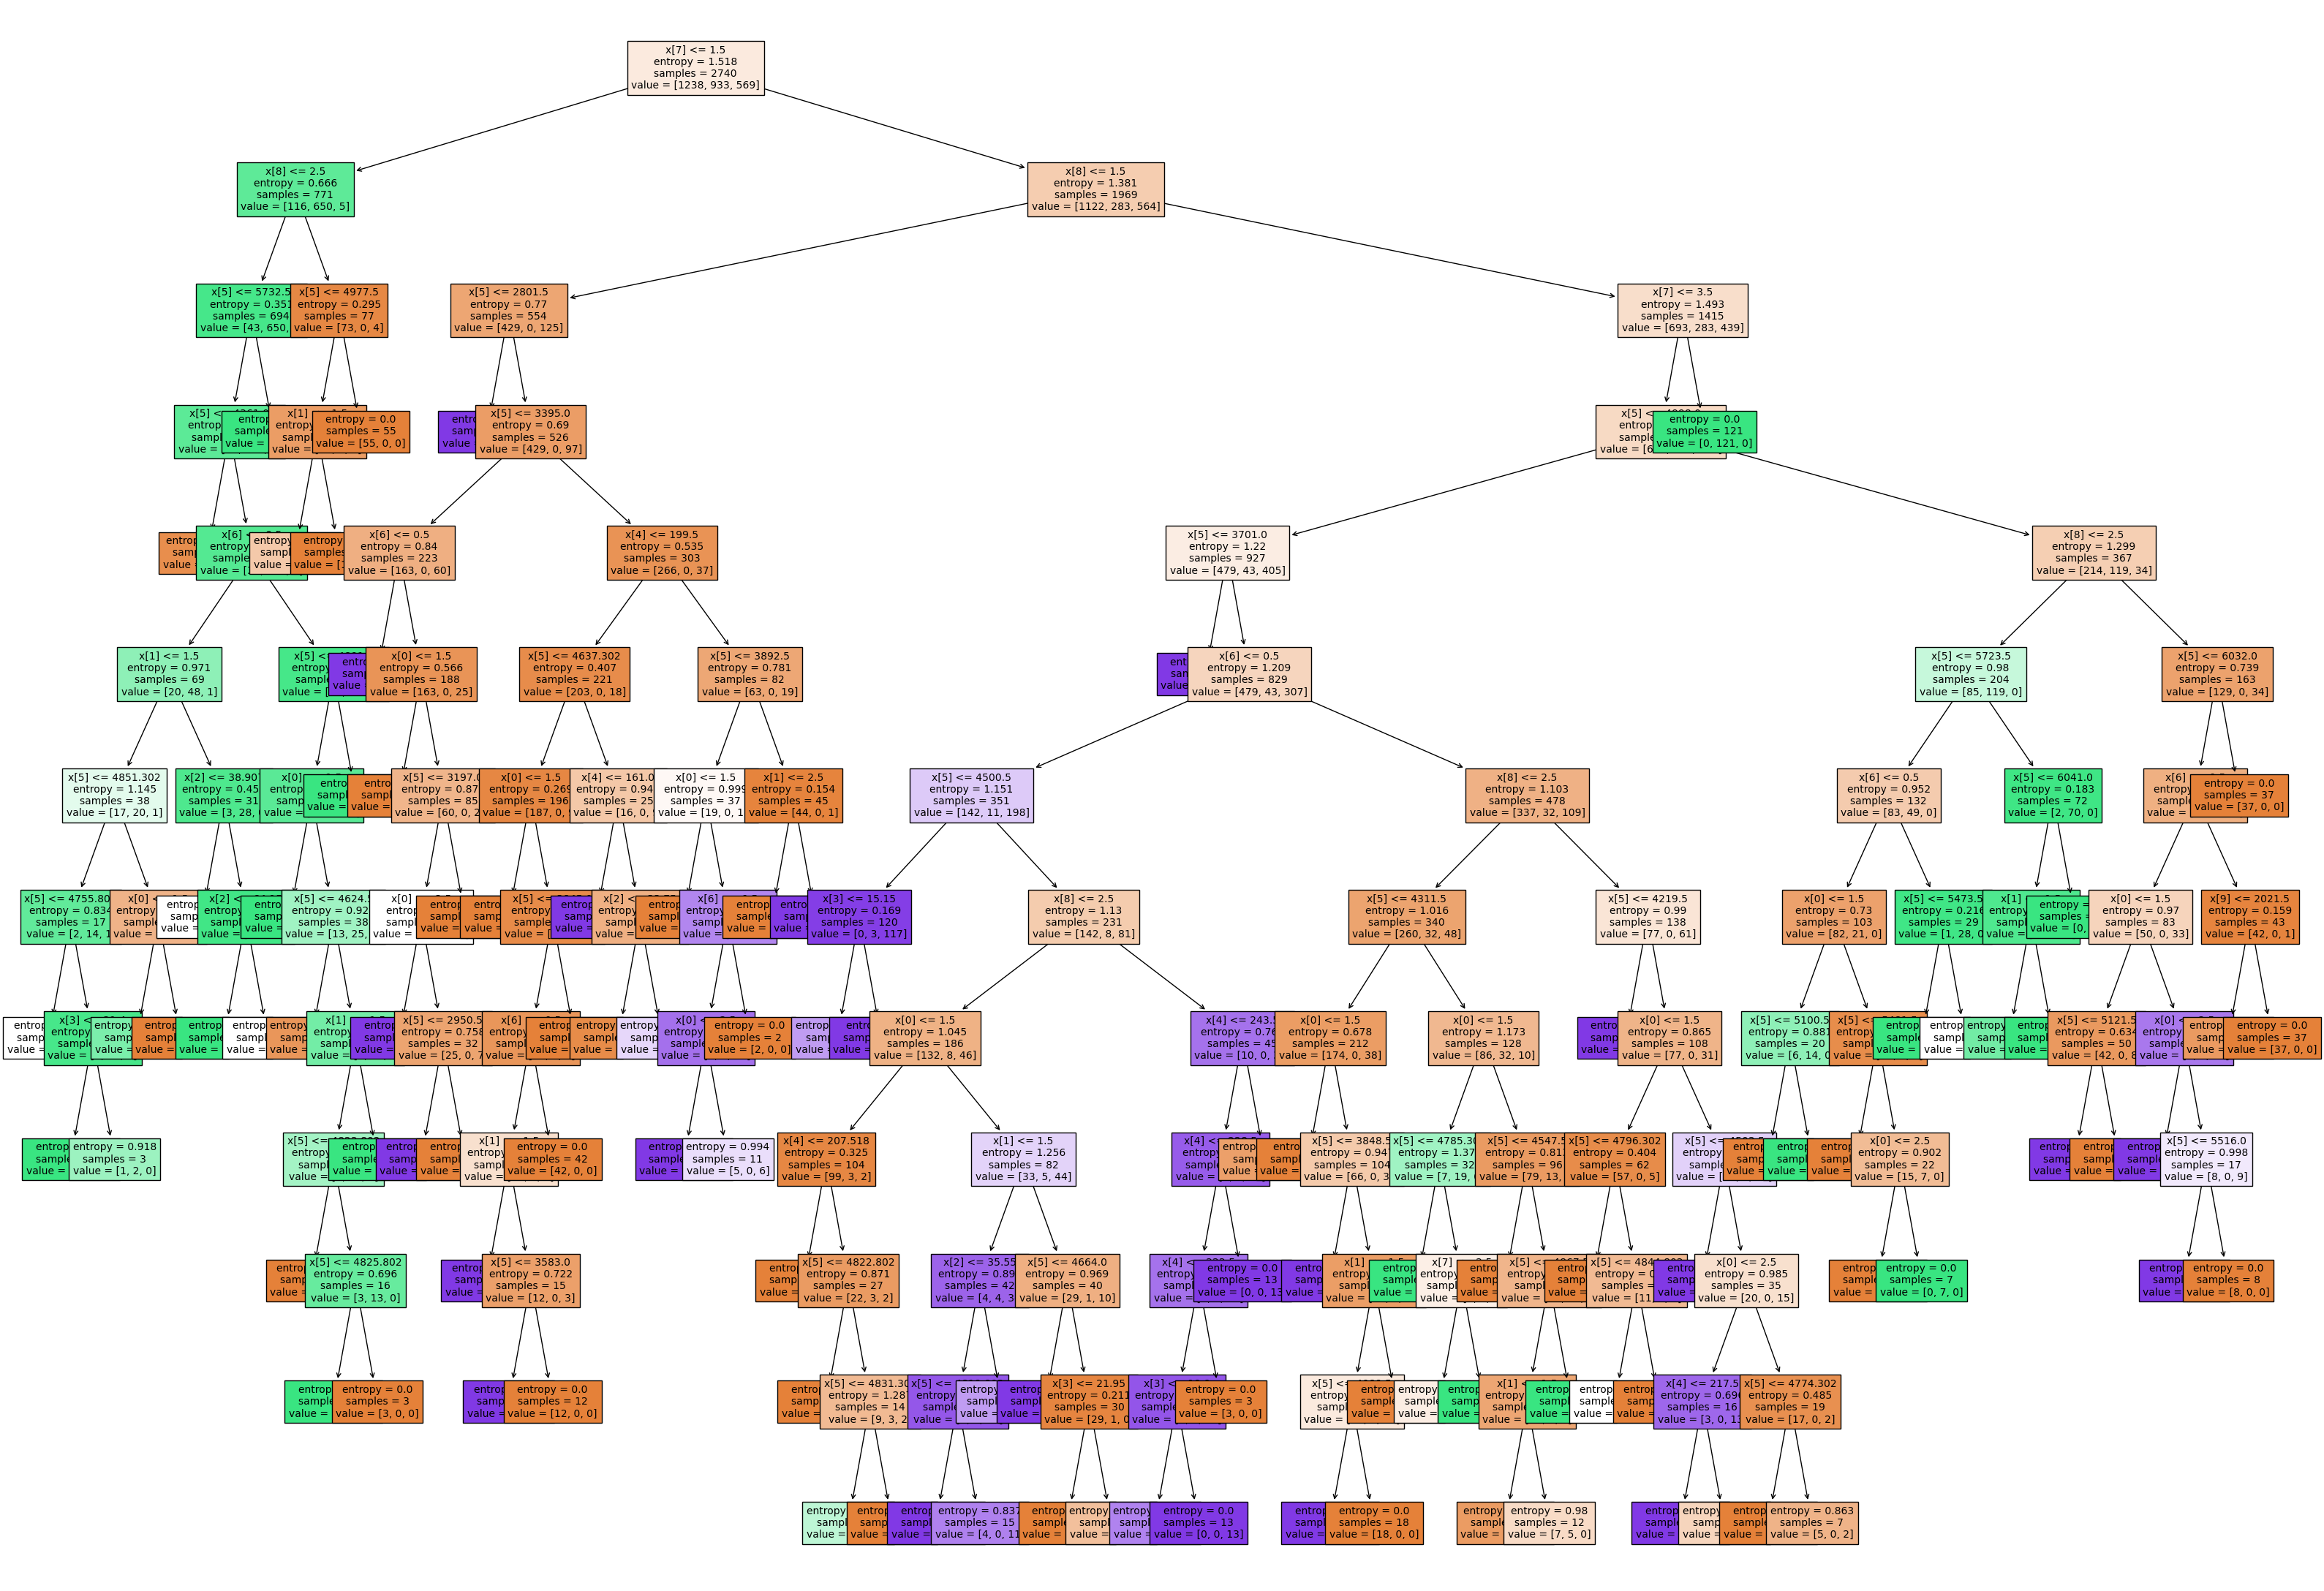

In [76]:
from sklearn.tree import plot_tree

#code here
plt.figure(figsize=(40, 28))
plot_tree(model, fontsize=10, filled=True)
plt.show()




## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [77]:
# code here


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")




Classification Accuracy: 95.18%


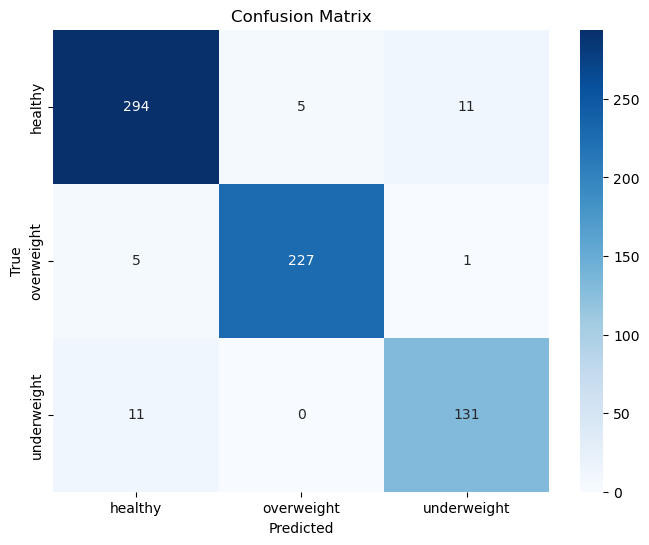

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#code here


health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
labels = ['healthy', 'overweight', 'underweight']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Fill the blanks:** The model most frequently mistakes class(es) ____"underweight"_____ for class(es) ______"healthy"___.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
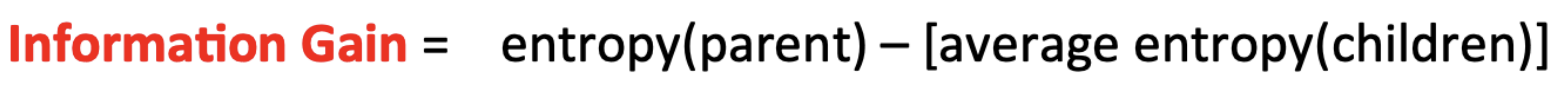



##### I will check the entropy of the parent and its first two childs from the plotted tree.

In [79]:
# code here


parent_entropy = 1.518
child_1_entropy = 0.666
child_2_entropy = 1.381

parent_samples_num = 2740
child_1_samples_num = 771
child_2_samples_num = 1969

# calculate the weighted average of entropy of children
weighted_average_chidren_entropy = (child_1_samples_num/parent_samples_num)*child_1_entropy + (child_2_samples_num/parent_samples_num)*child_2_entropy 

# calculate the information gain
info_gain = parent_entropy - weighted_average_chidren_entropy

print("Information gain of the first split: ", info_gain)



Information gain of the first split:  0.3381916058394161


##### The result indicates the reduction in entropy


## 9) GPT 3.5 Chat History

Submit the link for your chat history.



*   When you are in the chat, click on the "Share Chat" button on the top right (Shown Below).

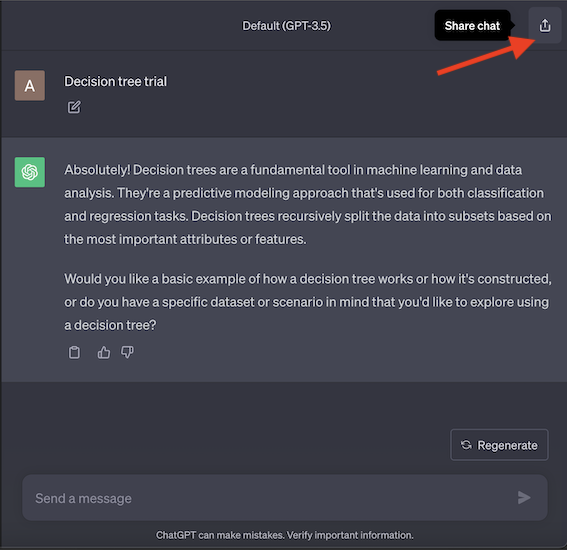

- On the screen that opens up, name the chat Name-Surname-CS412-HW1 (Shown Below).

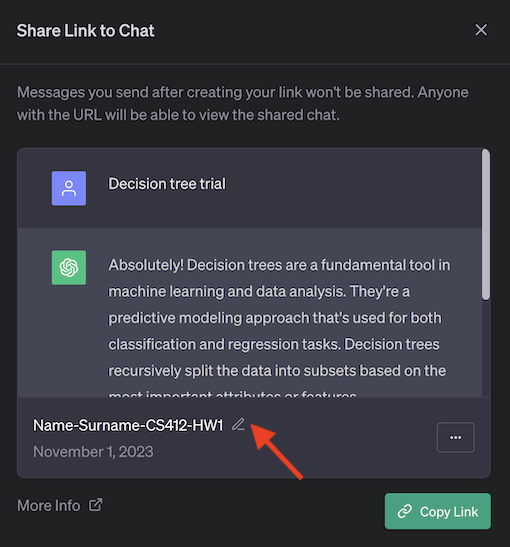

- Set sharing to "Share your name" (Shown Below).

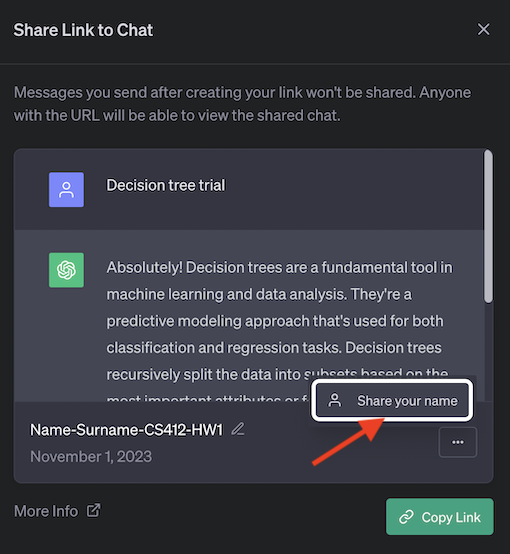

- Copy link and paste to the text cell below (Shown Below).

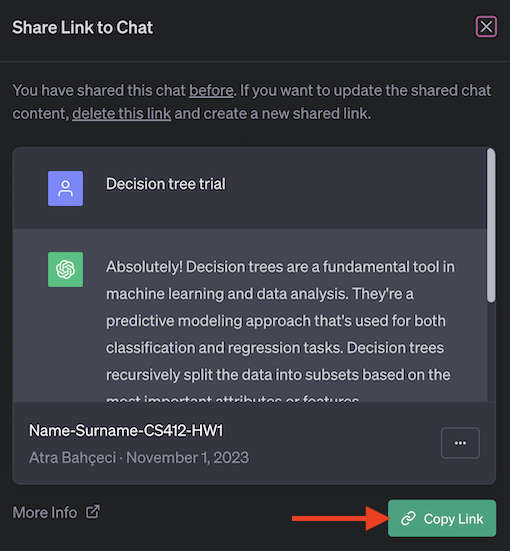

**Link to Chat:** paste link here

https://chat.openai.com/share/f2f18684-4a16-4c05-a2d1-c0f96d1de869